In [67]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fftpack import dct

In [68]:
# Cargar la imagen en escala de grises
img = Image.open('imagen2.jpg').convert('L')
img_array = np.array(img)

In [69]:
# Aplicar la transformada de Fourier
f = np.fft.fft2(img_array)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

In [70]:
# Aplicar la transformada discreta del coseno
dct_array = dct(dct(img_array.T, norm='ortho').T, norm='ortho')
dct_spectrum = 20*np.log(np.abs(dct_array))


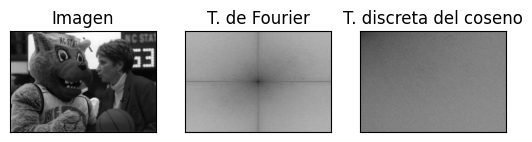

In [71]:
# Invertir los colores de las imágenes de la DFT y DCT
magnitude_spectrum = 255 - magnitude_spectrum
dct_spectrum = 255 - dct_spectrum

# Mostrar la imagen original, la DFT y la DCT
plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('T. de Fourier'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dct_spectrum, cmap = 'gray')
plt.title('T. discreta del coseno'), plt.xticks([]), plt.yticks([])
# Calcular el Template Matching utilizando la convolución
template = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
matched = convolve2d(img_array, template, mode='same', boundary='fill', fillvalue=0)
plt.show()

In [72]:
# Función para calcular la distancia euclidiana entre dos matrices
def euclidean_distance(image, kernel):
    diff = image - kernel
    distance = np.sqrt(np.sum(diff**2))
    return distance

In [73]:
# Función para realizar el Template Matching utilizando convolución y distancia euclidiana
def template_matching(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape

    # Calcular el tamaño del resultado
    result_height = img_height - kernel_height + 1
    result_width = img_width - kernel_width + 1

    # Crear una matriz vacía para almacenar el resultado
    result = np.zeros((result_height, result_width))

    # Realizar la convolución y calcular la distancia euclidiana
    for i in range(result_height):
        for j in range(result_width):
            sub_image = img[i:i+kernel_height, j:j+kernel_width]
            result[i, j] = euclidean_distance(sub_image, kernel)

    return result

In [74]:
# Definir el kernel
kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

In [75]:
# Realizar el Template Matching
matched_array = template_matching(img_array, kernel)

# Encontrar las coordenadas del mejor ajuste
best_match = np.unravel_index(np.argmin(matched_array), matched_array.shape)
best_x, best_y = best_match[1], best_match[0]

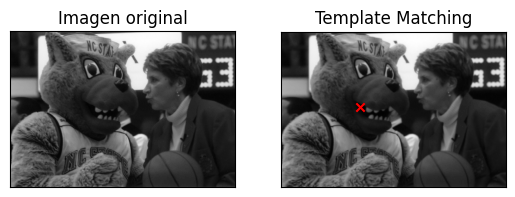

In [76]:
# Mostrar la imagen original y marcar la ubicación del mejor ajuste
plt.subplot(121), plt.imshow(img_array, cmap='gray')
plt.title('Imagen original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(matched_array, cmap='gray')
plt.title('Template Matching'), plt.xticks([]), plt.yticks([])
plt.scatter(best_x, best_y, marker='x', color='red')
plt.show()